# Adult Data Set classification 

## 載入相關套件

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing , linear_model
from sklearn.naive_bayes import GaussianNB
import csv
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## 1. 載入資料集

## 抓檔案丟list看一下

In [2]:
 with open('adult.data.csv', 'r', encoding='utf-8') as file: 
    csvReader = csv.reader(file)
    csvList = list(csvReader)
    for item in csvList:
        print(item)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## 看一下info 跟 desc

In [3]:
ds = pd.read_csv("adult.data")
ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# 描述統計量
ds.describe()


,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## 抓前五筆資料

In [5]:
ds.head()


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## 轉一下row and columns 看

In [6]:
ds.head().T

,0,1,2,3,4
39,50,38,53,28,37
State-gov,Self-emp-not-inc,Private,Private,Private,Private
77516,83311,215646,234721,338409,284582
Bachelors,Bachelors,HS-grad,11th,Bachelors,Masters
13,13,9,7,13,14
Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse
Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty,Exec-managerial
Not-in-family,Husband,Not-in-family,Husband,Wife,Wife
White,White,White,Black,Black,White
Male,Male,Male,Male,Female,Female


# 確認 cloumns 數量

In [7]:
len(list(ds[0:1:-1]))

15

## 看欄位是否有空值row

In [8]:
ds.isnull().sum()

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

## 定義欄位header ，後再讀出確認

In [9]:
data_header = ['Age','Workclass','fnlwgt','Education','Education-num','Marital_Status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','hrs_per_week','Native-Country','Earning_potential']
adult_data = pd.read_csv("adult.data",names = data_header)
adult_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 再看一下info (columns header ok)

In [10]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                32561 non-null  int64 
 1   Workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   Education          32561 non-null  object
 4   Education-num      32561 non-null  int64 
 5   Marital_Status     32561 non-null  object
 6   Occupation         32561 non-null  object
 7   Relationship       32561 non-null  object
 8   Race               32561 non-null  object
 9   Sex                32561 non-null  object
 10  Capital-gain       32561 non-null  int64 
 11  Capital-loss       32561 non-null  int64 
 12  hrs_per_week       32561 non-null  int64 
 13  Native-Country     32561 non-null  object
 14  Earning_potential  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Random抽50筆資料來看

In [11]:
adult_data.sample(50)

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
30638,25,Self-emp-inc,181691,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,?,<=50K
23914,73,Private,220019,9th,5,Widowed,Other-service,Unmarried,White,Female,0,0,9,United-States,<=50K
5103,54,Self-emp-not-inc,212165,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,<=50K
22739,27,Private,169460,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11612,47,Private,398652,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K
10126,19,?,48393,Some-college,10,Never-married,?,Own-child,White,Male,0,0,84,United-States,<=50K
26891,45,Private,140644,Doctorate,16,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,45,United-States,>50K
8763,26,Private,247025,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
482,28,State-gov,70100,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,20,United-States,<=50K
29120,38,Local-gov,256864,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


## 試試看有沒有?號的row ,用nan 標註

In [12]:
adult_data = adult_data.replace(to_replace = '%?%', value = np.nan) 
adult_data.isna().sum()

Age                  0
Workclass            0
fnlwgt               0
Education            0
Education-num        0
Marital_Status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
hrs_per_week         0
Native-Country       0
Earning_potential    0
dtype: int64

## 檢查數據並找 columns , object , 跟數位列，分別print

In [13]:
all_columns = list(adult_data.columns)
print('all_columns:\n {}'.format(all_columns))

categorical_columns = list(adult_data.select_dtypes(include=['object']).columns)
print('Categorical columns:\n {}'.format(categorical_columns))

numerical_columns = list(adult_data.select_dtypes(include=['int64', 'float64']).columns)
print('Numerical columns:\n {}'.format(numerical_columns))

all_columns:
 ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country', 'Earning_potential']
Categorical columns:
 ['Workclass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-Country', 'Earning_potential']
Numerical columns:
 ['Age', 'fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'hrs_per_week']


## 2. 資料探索與分析

In [14]:
adult_data.describe()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,hrs_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
adult_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
Capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hrs_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [16]:
df = adult_data

## 視覺化

<AxesSubplot:>

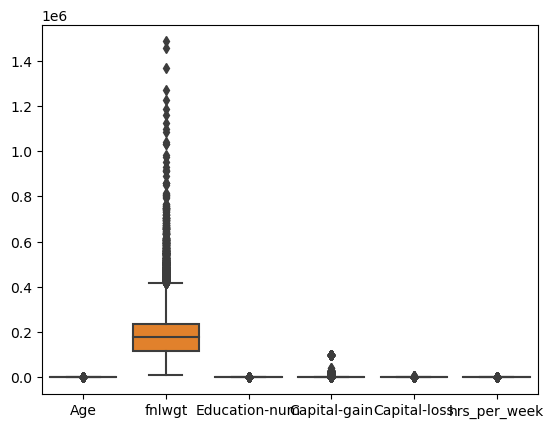

In [17]:
# 箱型圖
import seaborn as sns
sns.boxplot(data=df)

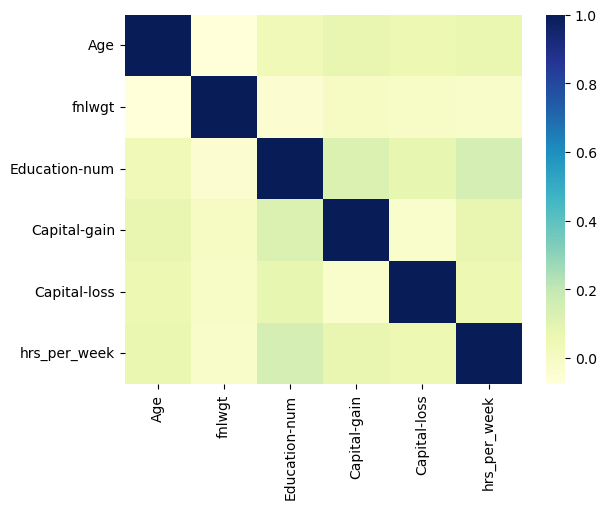

In [18]:
sns.heatmap(df.corr(), cmap = "YlGnBu")
plt.show()

In [19]:
y = df.Earning_potential 
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Earning_potential, Length: 32561, dtype: object

<AxesSubplot:xlabel='Earning_potential', ylabel='count'>

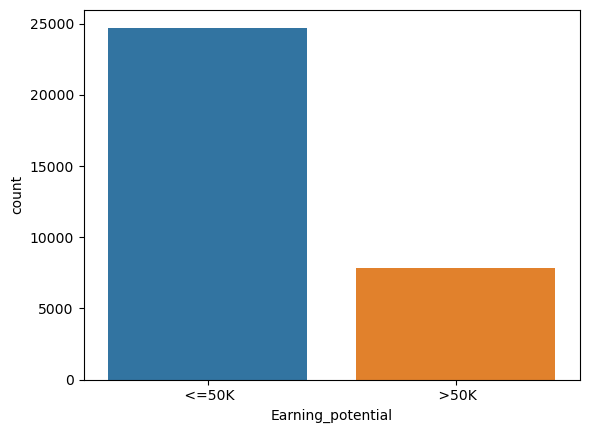

In [20]:
# y 各類別資料筆數統計
import seaborn as sns
sns.countplot(x=y)

In [21]:
# 以Pandas函數統計各類別資料筆數
pd.Series(y).value_counts()

 <=50K    24720
 >50K      7841
Name: Earning_potential, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


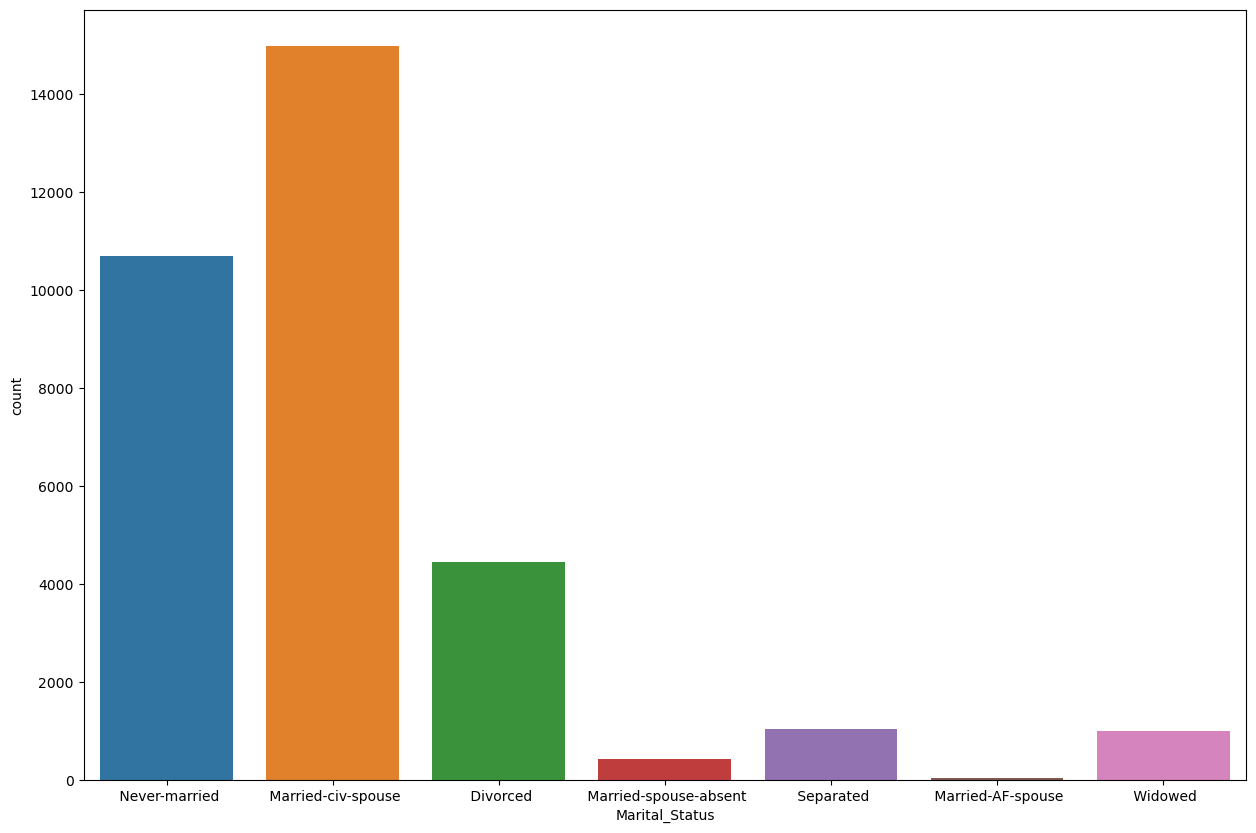

In [22]:
plt.figure(figsize = (15,10))
sns.countplot(adult_data[categorical_columns[2]])
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


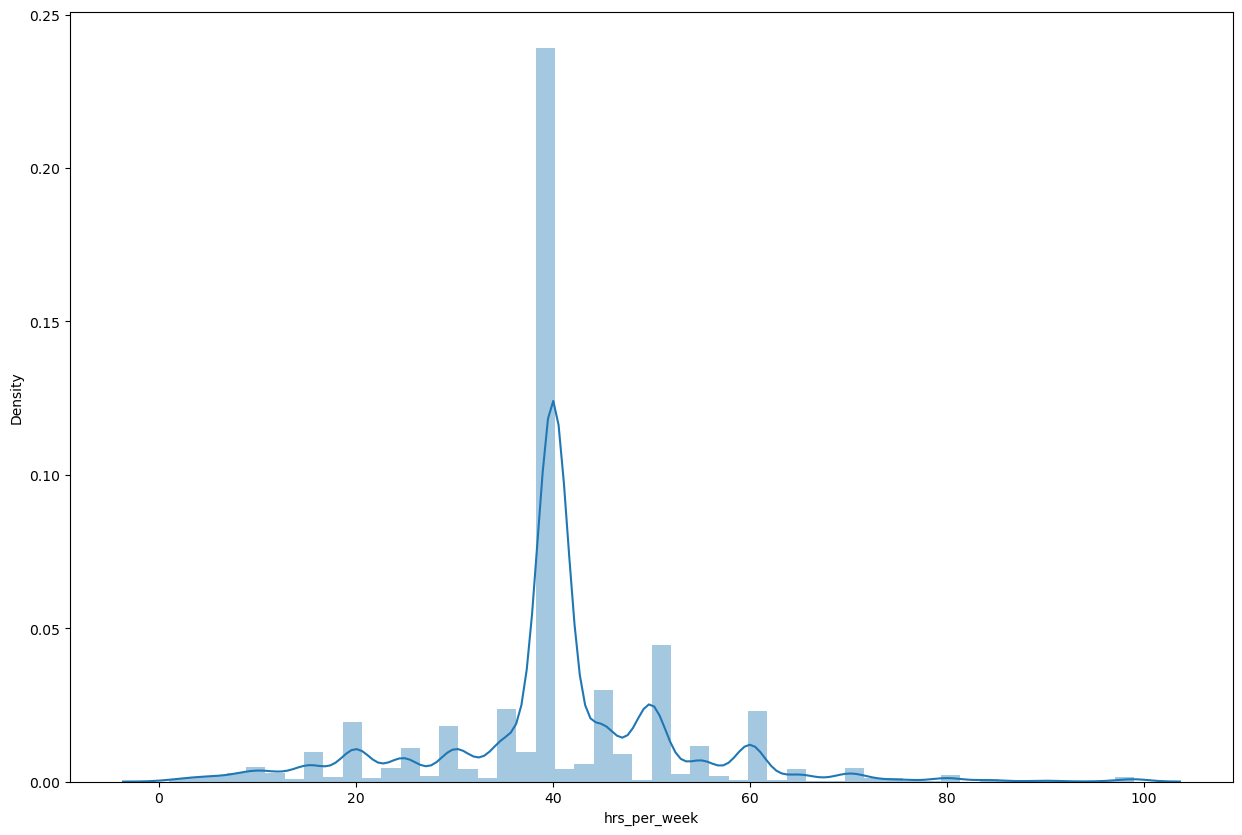

In [23]:
plt.figure(figsize=(15,10))
sns.distplot(df['hrs_per_week'])
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

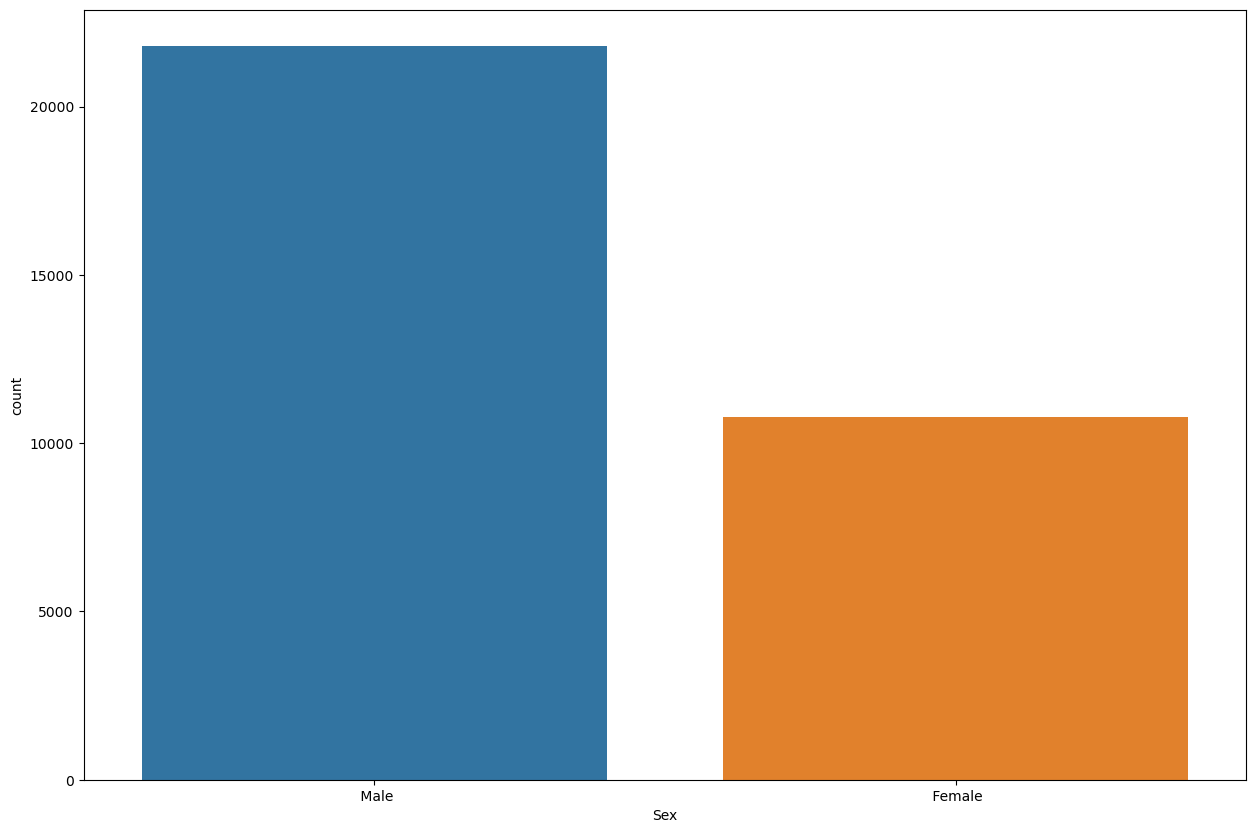

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(df['Sex'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


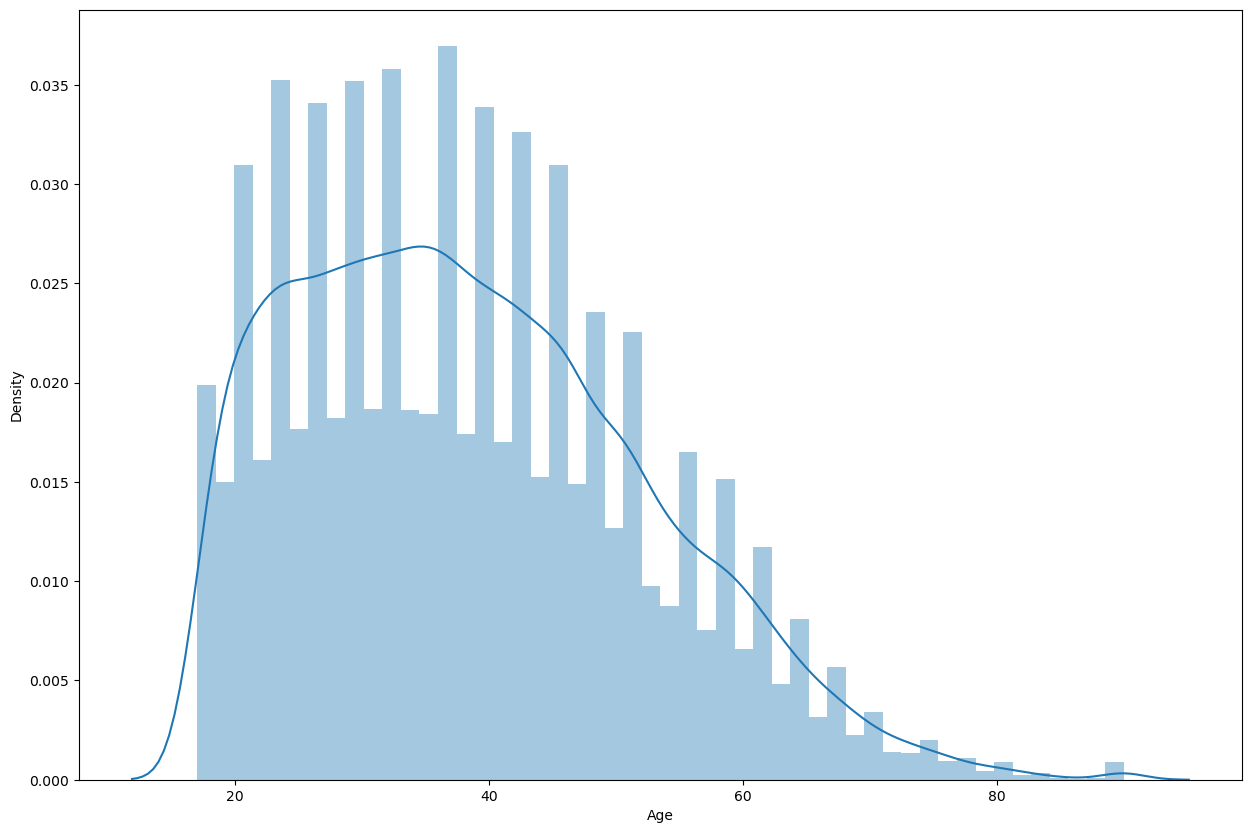

In [25]:
plt.figure(figsize=(15,10))
sns.distplot(df['Age'])
plt.show()

In [26]:
df.groupby(['Marital_Status', 'Earning_potential']).size()

Marital_Status          Earning_potential
 Divorced                <=50K                3980
                         >50K                  463
 Married-AF-spouse       <=50K                  13
                         >50K                   10
 Married-civ-spouse      <=50K                8284
                         >50K                 6692
 Married-spouse-absent   <=50K                 384
                         >50K                   34
 Never-married           <=50K               10192
                         >50K                  491
 Separated               <=50K                 959
                         >50K                   66
 Widowed                 <=50K                 908
                         >50K                   85
dtype: int64

In [27]:
df.groupby(['Education', 'Earning_potential']).size()

Education      Earning_potential
 10th           <=50K                871
                >50K                  62
 11th           <=50K               1115
                >50K                  60
 12th           <=50K                400
                >50K                  33
 1st-4th        <=50K                162
                >50K                   6
 5th-6th        <=50K                317
                >50K                  16
 7th-8th        <=50K                606
                >50K                  40
 9th            <=50K                487
                >50K                  27
 Assoc-acdm     <=50K                802
                >50K                 265
 Assoc-voc      <=50K               1021
                >50K                 361
 Bachelors      <=50K               3134
                >50K                2221
 Doctorate      <=50K                107
                >50K                 306
 HS-grad        <=50K               8826
                >50K    

In [28]:
# 以Pandas函數統計各類別資料筆數
pd.Series(y).value_counts()

 <=50K    24720
 >50K      7841
Name: Earning_potential, dtype: int64

## 4. 資料分割


In [29]:
y = df.Earning_potential 
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Earning_potential, Length: 32561, dtype: object

In [30]:
# 指定X，並轉為 Numpy 陣列
X = df.values

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 15), (6513, 15), (26048,), (6513,))

In [31]:
y_train

27031     <=50K
26930      >50K
22324     <=50K
5606       >50K
942        >50K
          ...  
7694       >50K
14237      >50K
22962     <=50K
2776      <=50K
20840     <=50K
Name: Earning_potential, Length: 26048, dtype: object

In [32]:
numerical_columns

['Age',
 'fnlwgt',
 'Education-num',
 'Capital-gain',
 'Capital-loss',
 'hrs_per_week']

In [33]:
df.corr()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,hrs_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hrs_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


## Preprocessing  Null Value Treatment

In [34]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [35]:
#checking for dataset info before replacing columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                32561 non-null  int64 
 1   Workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   Education          32561 non-null  object
 4   Education-num      32561 non-null  int64 
 5   Marital_Status     32561 non-null  object
 6   Occupation         32561 non-null  object
 7   Relationship       32561 non-null  object
 8   Race               32561 non-null  object
 9   Sex                32561 non-null  object
 10  Capital-gain       32561 non-null  int64 
 11  Capital-loss       32561 non-null  int64 
 12  hrs_per_week       32561 non-null  int64 
 13  Native-Country     32561 non-null  object
 14  Earning_potential  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [36]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [37]:
df['Sex'] = pd.Categorical(df['Sex']).codes
df['Native-Country'] = pd.Categorical(df['Native-Country']).codes
df['Workclass'] = pd.Categorical(df['Workclass']).codes
df['Occupation'] = pd.Categorical(df['Occupation']).codes
df['Education'] = pd.Categorical(df['Education']).codes
df['Earning_potential'] = pd.Categorical(df['Earning_potential']).codes

df.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
0,39,7,77516,9,13,Never-married,1,Not-in-family,White,1,2174,0,40,39,0
1,50,6,83311,9,13,Married-civ-spouse,4,Husband,White,1,0,0,13,39,0
2,38,4,215646,11,9,Divorced,6,Not-in-family,White,1,0,0,40,39,0
3,53,4,234721,1,7,Married-civ-spouse,6,Husband,Black,1,0,0,40,39,0
4,28,4,338409,9,13,Married-civ-spouse,10,Wife,Black,0,0,0,40,5,0


# 抓全部非數值，encode to  數值

In [38]:
# 50筆資料看一下，先不做全部轉換數值
df.sample(50)

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
26759,35,4,126569,11,9,Divorced,3,Own-child,White,1,0,0,20,39,0
4800,29,4,319149,2,8,Married-civ-spouse,14,Husband,White,1,0,0,40,26,0
11166,37,4,174503,9,13,Widowed,10,Not-in-family,White,0,0,0,50,39,0
17762,18,0,118847,11,9,Never-married,0,Own-child,White,0,0,0,24,39,0
7990,27,4,210867,5,4,Never-married,5,Own-child,White,1,0,0,50,0,0
18272,80,4,86111,10,16,Married-civ-spouse,10,Husband,White,1,0,0,30,39,0
24608,30,4,398662,11,9,Never-married,7,Own-child,White,1,0,0,40,39,0
20751,36,4,177907,15,10,Married-civ-spouse,7,Husband,White,1,0,0,65,39,0
4805,51,1,282680,10,16,Never-married,10,Not-in-family,White,0,0,1564,70,39,1
15436,30,4,186932,10,16,Married-civ-spouse,10,Husband,White,1,5178,0,75,39,1


In [39]:
# label_encoder = LabelEncoder()
# for column in df.columns:
#     if not df[column].dtype == 'int64':  # 非數值欄位
#         df[column] = label_encoder.fit_transform(df[column])
# print(df)

# 使用"Age','Sex','hrs_per_week','Native-Country','Workclass','Education','Occupation"欄位來定義特徵向量X 。使用"Earning_potential"來定義y (y 取一維)


In [50]:
X = np.asarray(df[['Age','Sex','hrs_per_week','Native-Country','Workclass','Education','Occupation']])
y = np.asarray(df[['Earning_potential']]).flatten()
print(X.shape)
print(y.shape)
print(y)

(32561, 7)
(32561,)
[0 0 0 ... 0 0 1]


## 將資料集 8:2分成訓練資料及測試資料(假設random_state=1)

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## 將訓練資料做標準化

In [52]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

## 建立機器學習模型並訓練 

In [43]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

## 將測試資料做標準化並用訓練好的模型做預測

In [53]:
x_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

In [54]:
logistic = linear_model.LogisticRegression()
logistic.fit(X,y)
print( logistic.intercept_)

[-6.40317081]


## 測試另一個模型

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()


In [56]:
clf.fit(X_train_std, y_train)

LogisticRegression()

In [57]:
accuracy = accuracy_score(y_test,y_pred)
num_correct_samples = accuracy_score(y_test,y_pred,normalize=False)
con_matrix = confusion_matrix(y_test,y_pred)
print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('confusion matrix: {}'.format(con_matrix))

NameError: name 'confusion_matrix' is not defined

In [69]:
y_pred = clf.predict(X_test_std)
y_pred

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [70]:
# 計算準確率
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

22.83%


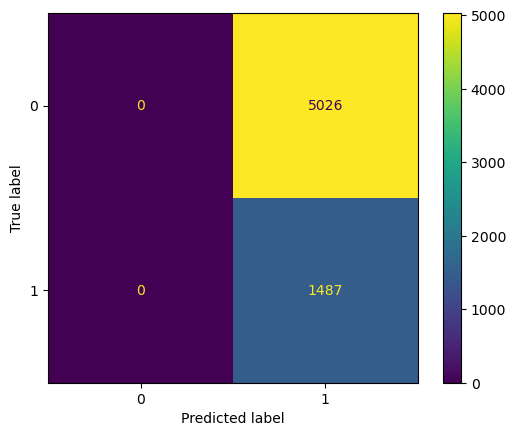

In [67]:
# 混淆矩陣圖
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 5. 選擇演算法

In [65]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

## 6. 模型訓練

In [60]:
clf.fit(X_train_std, y_train)

LogisticRegression()

## 模型評估

In [61]:
y_pred = clf.predict(X_test_std)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [62]:
# 計算準確率
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

22.83%


In [63]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[   0 5026]
 [   0 1487]]


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (15).

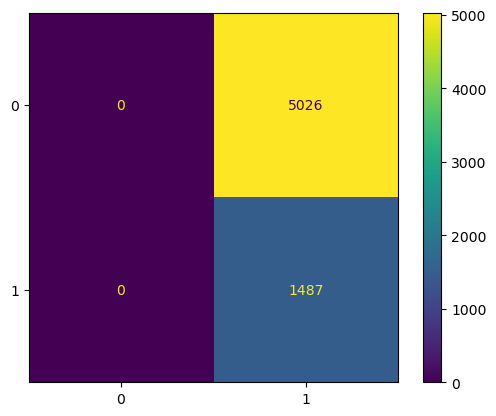

In [64]:
# 混淆矩陣圖
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)
                              , display_labels=df)
disp.plot()
plt.show()